## 1. Read the data Churn.csv into pyspark

In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.appName("PySpark").getOrCreate()
sqlContext = SQLContext(spark)
sc = spark.sparkContext

In [ ]:
#import findspark
#findspark.init()
#import pyspark

In [2]:
# Reading the CSV
file_path ="D:\\Churn-3.csv"
churndf = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load(file_path)

In [3]:
#Alternate way to read the input file. Use any one
DF = spark.read.format("org.apache.spark.sql.execution.datasources.csv.CSVFileFormat") \
                  .option("header","true") \
                  .option("inferSchema","true") \
                  .load(file_path)

In [4]:
#Check Data type
type(churndf)

pyspark.sql.dataframe.DataFrame

In [5]:
type(DF)

pyspark.sql.dataframe.DataFrame

In [6]:
# Length of imported dataset
churndf.count()

3333

In [7]:
len(churndf.columns)

21

In [8]:
# Check the schema
churndf.printSchema()

root
 |-- Account Length: integer (nullable = true)
 |-- VMail Message: integer (nullable = true)
 |-- Day Mins: double (nullable = true)
 |-- Eve Mins: double (nullable = true)
 |-- Night Mins: double (nullable = true)
 |-- Intl Mins: double (nullable = true)
 |-- CustServ Calls: integer (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- Intl Plan: integer (nullable = true)
 |-- VMail Plan: integer (nullable = true)
 |-- Day Calls: integer (nullable = true)
 |-- Day Charge: double (nullable = true)
 |-- Eve Calls: integer (nullable = true)
 |-- Eve Charge: double (nullable = true)
 |-- Night Calls: integer (nullable = true)
 |-- Night Charge: double (nullable = true)
 |-- Intl Calls: integer (nullable = true)
 |-- Intl Charge: double (nullable = true)
 |-- State: string (nullable = true)
 |-- Area Code: integer (nullable = true)
 |-- Phone: string (nullable = true)



In [9]:
#Check the imported data
%matplotlib inline
import pandas as pd
pd.DataFrame(churndf.take(5), columns=churndf.columns)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


## 2. Calculate summary statistics of variables

In [10]:
#churndf.describe().show() # for beeter look ,use the below code
churndf.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Account Length,3333,101.06480648064806,39.822105928595676,1,243
VMail Message,3333,8.099009900990099,13.688365372038598,0,51
Day Mins,3333,179.77509750975116,54.46738920237146,0.0,350.8
Eve Mins,3333,200.98034803480346,50.713844425811985,0.0,363.7
Night Mins,3333,200.87203720372048,50.57384701365836,23.2,395.0
Intl Mins,3333,10.237293729372933,2.791839548408416,0.0,20.0
CustServ Calls,3333,1.5628562856285628,1.3154910448664752,0,9
Churn,3333,0.14491449144914492,0.352067423624126,0,1
Intl Plan,3333,0.0969096909690969,0.2958791454844147,0,1


In [11]:
#Lets understand the distribution of Target variables, churn
churndf.groupby(["Churn"]).count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1|  483|
|    0| 2850|
+-----+-----+



## 3. Plot histogram of various variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018FEFF932B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000018FF0A69390>]], dtype=object)

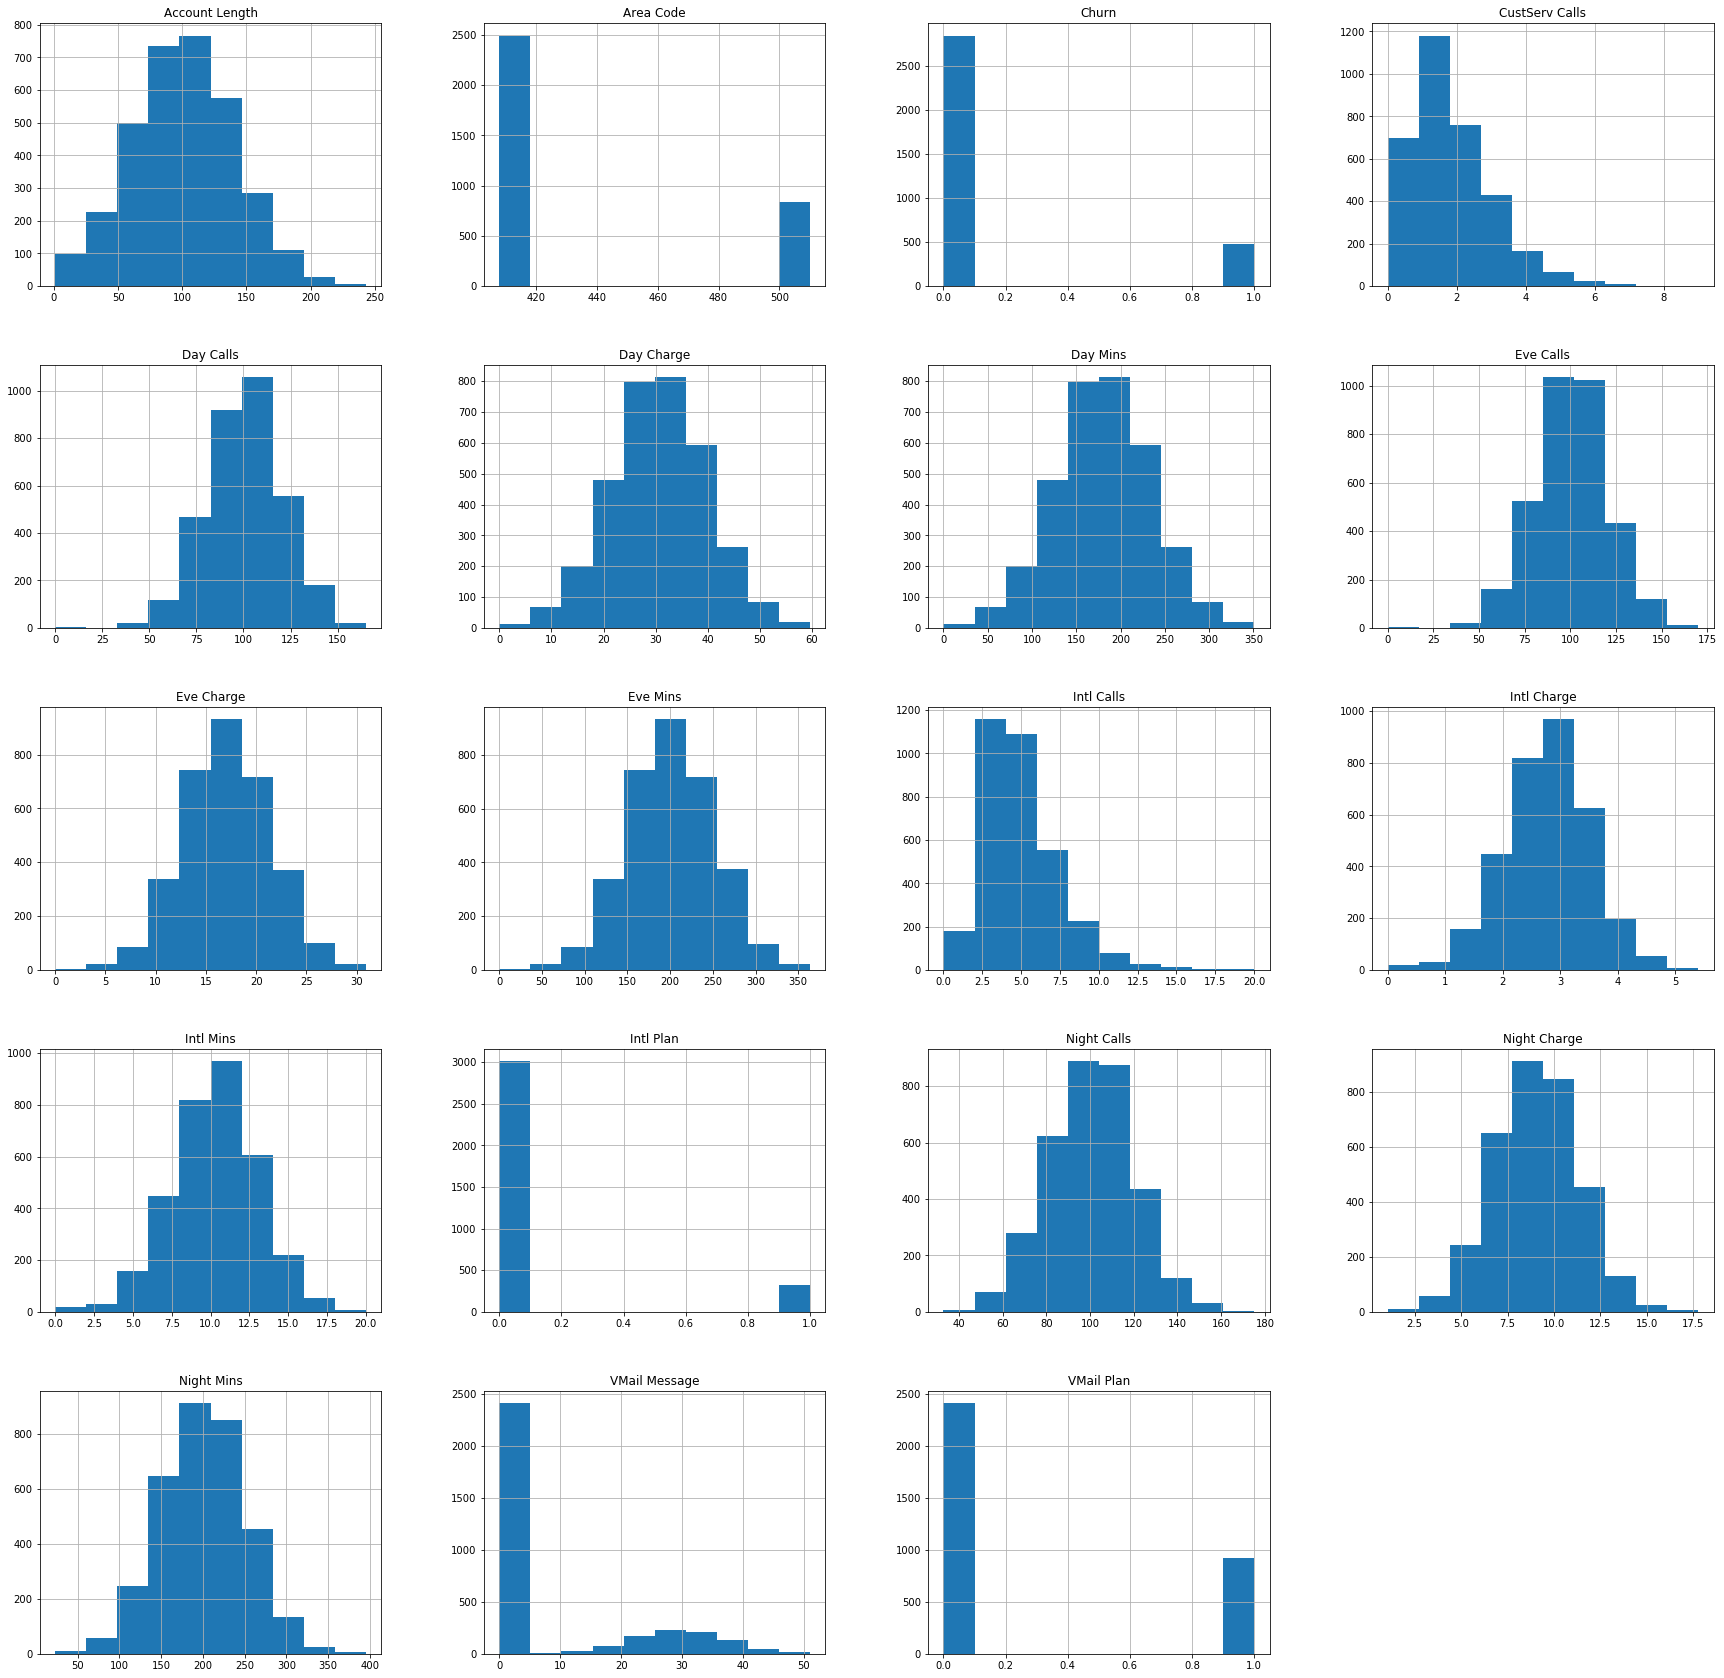

In [12]:
 churndf.toPandas().hist(figsize=(30, 30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018FF1ECCB00>]], dtype=object)

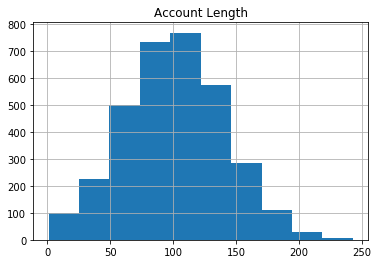

In [13]:
#Histogram of Account Length
churndf.toPandas().hist('Account Length')

### Variables like Day Charge,CustServ Calls,Day Mins,Intl Plan,Intl Charge & Intl Calls are having uneven distribution
### There is interaction between variables capturing - Minutes, Calls and Charges

## 4. Plot relationship of various variables with churn variable to explore if there is some interaction between them and churn

In [14]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

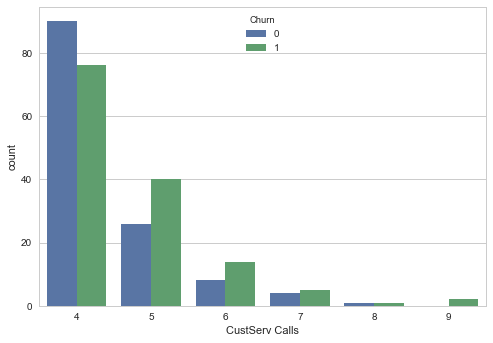

In [15]:
df=churndf.toPandas()
px=sns.countplot(x="CustServ Calls",hue="Churn",data=df.loc[df["CustServ Calls"]>3])

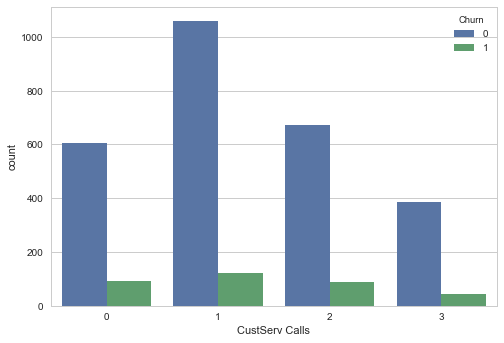

In [16]:
px=sns.countplot(x="CustServ Calls",hue="Churn",data=df.loc[df["CustServ Calls"]<=3])

## Anyone having more than 4 calls to Service center are high likelihood of Churn

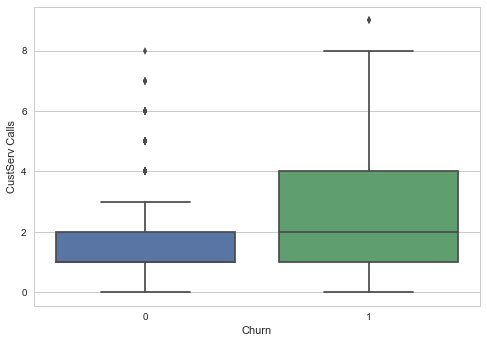

In [17]:
sns.boxplot(x="Churn", y="CustServ Calls", data=df)

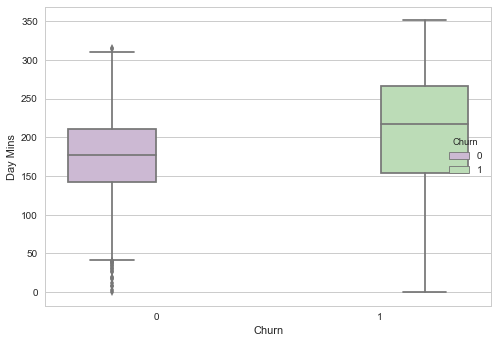

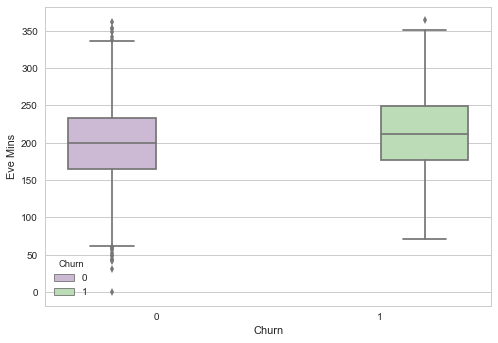

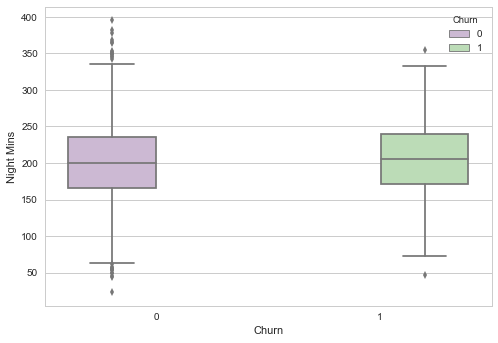

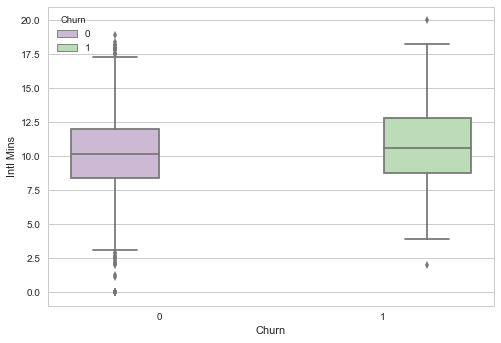

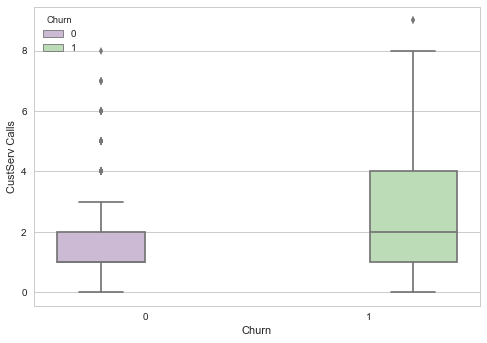

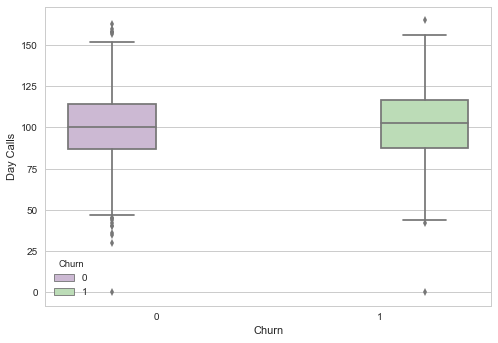

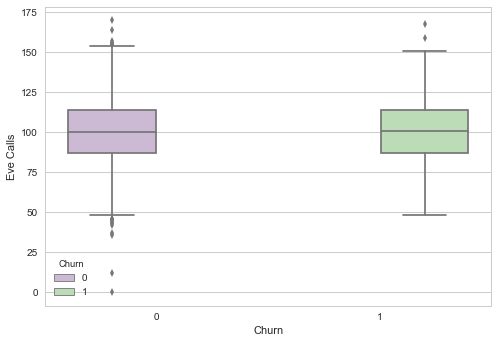

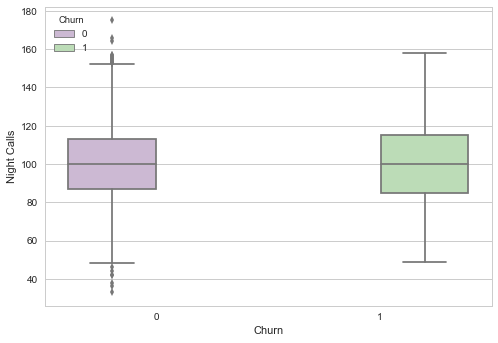

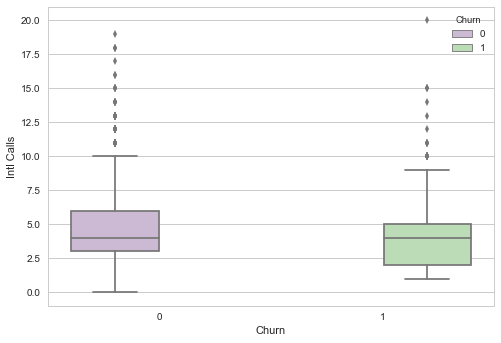

In [18]:
import matplotlib.pyplot as plt
sns.boxplot(x="Churn", y="Day Mins", hue="Churn", data=df, palette="PRGn")
plt.show()
sns.boxplot(x="Churn", y="Eve Mins", hue="Churn", data=df, palette="PRGn")
plt.show()
sns.boxplot(x="Churn", y="Night Mins", hue="Churn", data=df, palette="PRGn")
plt.show()
sns.boxplot(x="Churn", y="Intl Mins", hue="Churn", data=df, palette="PRGn")
plt.show()
sns.boxplot(x="Churn", y="CustServ Calls", hue="Churn", data=df, palette="PRGn")
plt.show()
sns.boxplot(x="Churn", y="Day Calls", hue="Churn", data=df, palette="PRGn")
plt.show()
sns.boxplot(x="Churn", y="Eve Calls", hue="Churn", data=df, palette="PRGn")
plt.show()
sns.boxplot(x="Churn", y="Night Calls", hue="Churn", data=df, palette="PRGn")
plt.show()
sns.boxplot(x="Churn", y="Intl Calls", hue="Churn", data=df, palette="PRGn")
plt.show()

### Variables like Day Charge,CustServ Calls,Day Mins,Intl Plan & Intl Calls are major drivers of customer churn

## 5. Calculate correlation of the dependent variable with the independent variables

In [19]:
# Independent variables
indepVariables = ['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 
                  'Intl Mins', 'CustServ Calls', 'Intl Plan', 'VMail Plan', 'Day Calls', 
                  'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 
                  'Intl Calls', 'Intl Charge']

# Calculating the pearsons correlation coefficient

for var in indepVariables:
    print("Correlation between Churn vs {} = {}".format(var, churndf.corr("Churn", var)))

Correlation between Churn vs Account Length = 0.01654074224367416
Correlation between Churn vs VMail Message = -0.08972796983506393
Correlation between Churn vs Day Mins = 0.20515082926138956
Correlation between Churn vs Eve Mins = 0.09279579031259134
Correlation between Churn vs Night Mins = 0.03549285342127396
Correlation between Churn vs Intl Mins = 0.06823877562717749
Correlation between Churn vs CustServ Calls = 0.2087499987837943
Correlation between Churn vs Intl Plan = 0.2598518473454819
Correlation between Churn vs VMail Plan = -0.1021481406701466
Correlation between Churn vs Day Calls = 0.01845931160857721
Correlation between Churn vs Day Charge = 0.2051507431701543
Correlation between Churn vs Eve Calls = 0.00923313191307819
Correlation between Churn vs Eve Charge = 0.09278603942871405
Correlation between Churn vs Night Calls = 0.006141203007399757
Correlation between Churn vs Night Charge = 0.03549555624050652
Correlation between Churn vs Intl Calls = -0.05284433577413789
Co

### Day Charge	0.205151	A weak positive linear relationship
### CustServ Calls	0.20875	A weak positive linear relationship
### Day Mins	0.205151	A weak positive linear relationship
### Intl Plan	0.259852	A weak positive linear relationship
### Intl Calls	-0.052844	A weak downhill negative linear relationsh
## Lets do further deep dive into these fields

### 6. What is your overall conclusion based on the analysis that you just did? ( Use Hypothesis Testing)

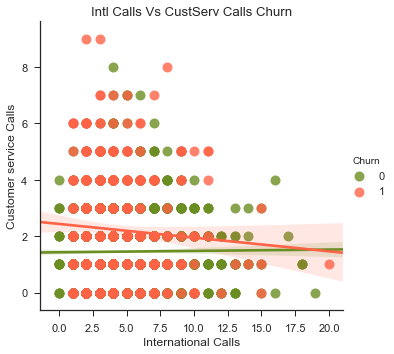

In [20]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.lmplot('Intl Calls', 'CustServ Calls',
           data=df,
           fit_reg=True,
           hue="Churn",
           palette=dict([(1,"#ff6347"), (0,"#6b8e23")]),
           scatter_kws={"marker": "D","s": 100})
plt.title('Intl Calls Vs CustServ Calls Churn')
plt.xlabel('International Calls')
plt.ylabel('Customer service Calls')

## Anyone having more than 3 calls to Customer care are high likelihood of Churn

In [21]:
# Lets understand it more with further deep dive 
rate_count = df[['CustServ Calls', 'Churn']].groupby(['CustServ Calls', 'Churn']).size().reset_index()
rate_count.columns = ['CustServ Calls', 'Churn', 'count']
rate_count

,CustServ Calls,Churn,count
0,0,0,605
1,0,1,92
2,1,0,1059
3,1,1,122
4,2,0,672
5,2,1,87
6,3,0,385
7,3,1,44
8,4,0,90
9,4,1,76


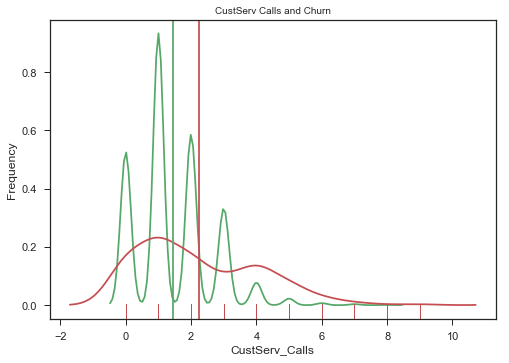

In [24]:
# Customer care call leading to churn distribution 
df.rename(columns={'CustServ Calls': 'CustServ_Calls'}, inplace=True)
sns.distplot( df.CustServ_Calls[df.Churn == 0 ],rug=True, color = 'g', hist = False )
sns.distplot( df.CustServ_Calls[df.Churn == 1], rug=True,color = 'r', hist = False )
sns.plt.axvline( x = df.CustServ_Calls[df.Churn == 0 ].mean(), color = 'g' )
sns.plt.axvline( x = df.CustServ_Calls[df.Churn == 1 ].mean(), color = 'r' )
plt.title( "CustServ Calls and Churn", fontsize = 10 )
plt.ylabel( "Frequency")

##Seems more than 3 calls to customer care leads to churn. Lets varify this with the help of statistical test
## Lets formulate hypothesis
### H0 : Calls to customer care >= 4 doesnot lead to churn
### H1: Calls to customer care >= 4 lead to churn

In [31]:
churn_df = df[(df.CustServ_Calls == 4) | (df.CustServ_Calls > 4) ]
#churn_df.CustServ_Calls.min()
#churn_df.CustServ_Calls.max()

In [32]:
# lets do t-test to check our formulated hypothesis
from scipy import stats
stats.ttest_ind( churn_df[churn_df.Churn == 0 ].CustServ_Calls,
               churn_df[churn_df.Churn == 1 ].CustServ_Calls)

Ttest_indResult(statistic=-2.2558631372693623, pvalue=0.024894843833283085)

#### The test result shows the test statistic "t" is equal to -2.25. This test statistic tells us how much the sample mean deviates.
#### A p-value < 0.05 indicates Calls to customer care >= 4 lead to churn

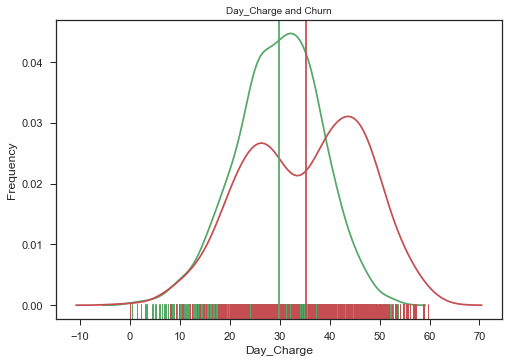

In [33]:
# Lets check for churn due to Day charge
df.rename(columns={'Day Charge': 'Day_Charge'}, inplace=True)
sns.distplot( df.Day_Charge[df.Churn == 0 ],rug=True, color = 'g', hist = False )
sns.distplot( df.Day_Charge[df.Churn == 1], rug=True,color = 'r', hist = False )
sns.plt.axvline( x = df.Day_Charge[df.Churn == 0 ].mean(), color = 'g' )
sns.plt.axvline( x = df.Day_Charge[df.Churn == 1 ].mean(), color = 'r' )
plt.title( "Day_Charge and Churn", fontsize = 10 )
plt.ylabel( "Frequency")

In [34]:
# Seems day charge more than 40 leads for high churn
# Lets test it using statistical test
stats.ttest_ind(df[df.Churn == 0 ].Day_Charge,df[df.Churn == 1 ].Day_Charge)

Ttest_indResult(statistic=-12.097547561012545, pvalue=5.3006059524084372e-33)

In [35]:
#Lets subset the data first and then test
Day_df = df[(df.Day_Charge == 40) | (df.Day_Charge > 40) ]

In [36]:
stats.ttest_ind(Day_df[Day_df.Churn == 0 ].Day_Charge,Day_df[Day_df.Churn == 1 ].Day_Charge)

Ttest_indResult(statistic=-9.3985757391308624, pvalue=1.8104864653607437e-19)